# FLANN

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img1 = cv2.imread('Ejemplo/zv/2.jpg')
img2 = cv2.imread('Ejemplo/zv/3.jpg')

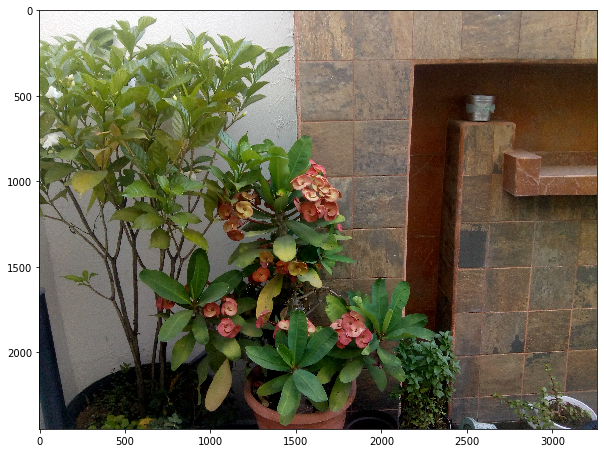

In [3]:
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(img1,cv2.COLOR_BGR2RGB))

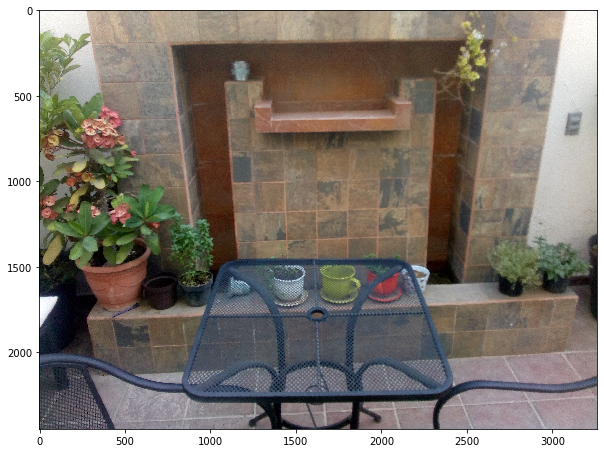

In [4]:
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(img2,cv2.COLOR_BGR2RGB))


In [5]:
def detect_compute_sift(img):
    gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    sift = cv2.xfeatures2d.SIFT_create()
    kp,des = sift.detectAndCompute(gray,None)
    return kp,des

In [6]:
kp1,des1 = detect_compute_sift(img1)
img1_points = img1.copy()
img1_points  = cv2.drawKeypoints(img1,kp1,img1_points)

In [7]:
kp2,des2 = detect_compute_sift(img2)
img2_points = img2.copy()
img2_points = cv2.drawKeypoints(img2,kp2,img2_points)

17937
7199
482029086


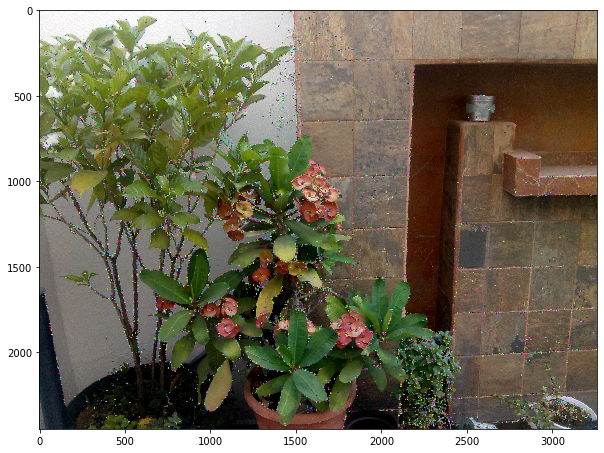

In [8]:
print(len(kp1))
print(len(kp2))
print(26414*18249)
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(img1_points,cv2.COLOR_BGR2RGB))

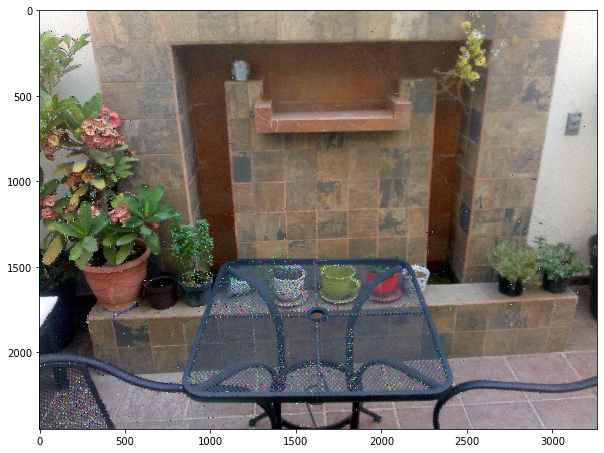

In [9]:
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(img2_points,cv2.COLOR_BGR2RGB))

## Fast Library for Approximate Nearest Neighbors (FLANN)

In [10]:
matcher = cv2.DescriptorMatcher_create(cv2.DescriptorMatcher_FLANNBASED)
knn_matches = matcher.knnMatch(des1, des2, 2)

In [11]:
ratio_thresh = 0.6
good_matches = []
for m,n in knn_matches:
    if m.distance < ratio_thresh * n.distance:
        good_matches.append(m)
        


In [12]:
img_matches = np.empty((max(img1.shape[0], img2.shape[0]), img1.shape[1]+img2.shape[1], 3), dtype=np.uint8)
img_matches = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, img_matches, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)


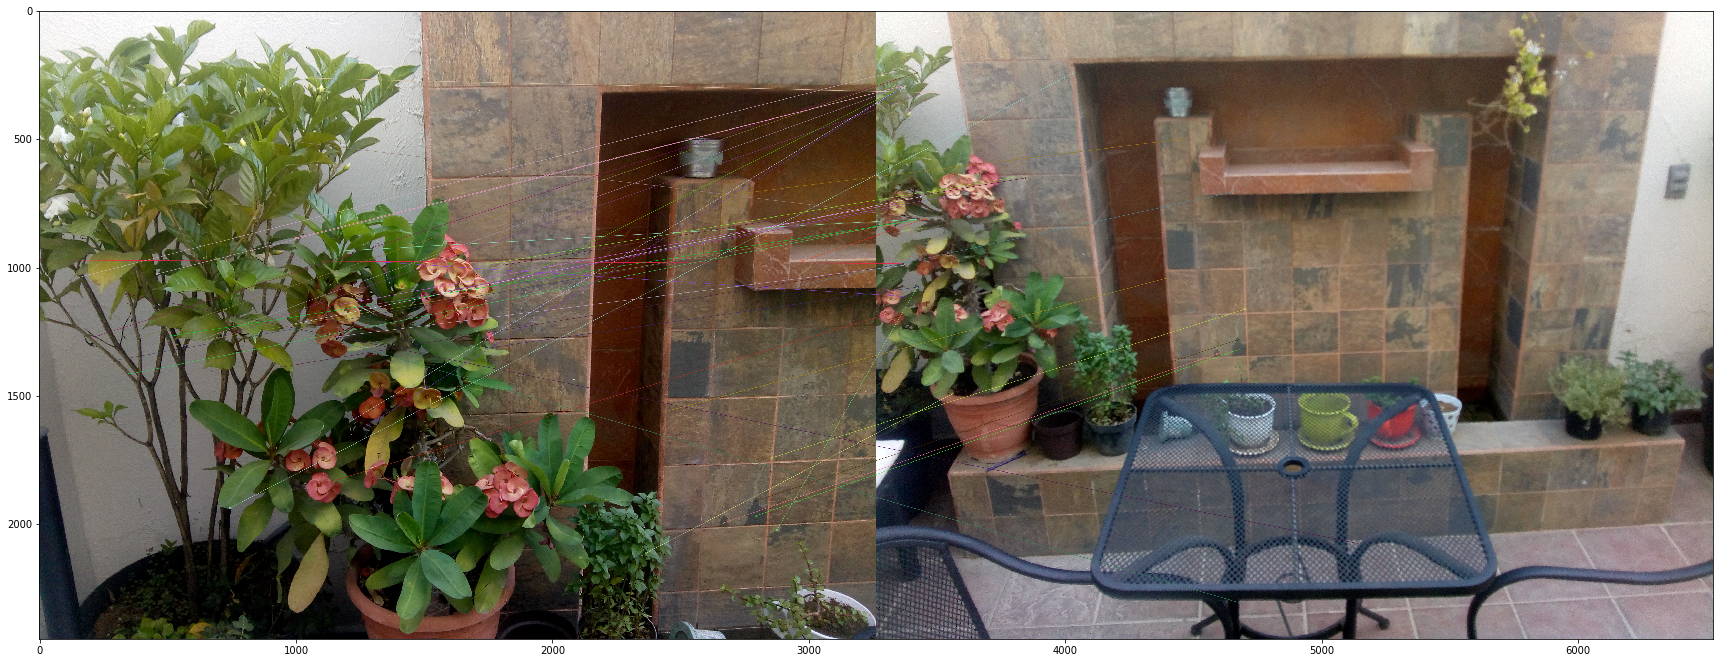

In [13]:
plt.figure(figsize=(30,30))
plt.imshow(cv2.cvtColor(img_matches,cv2.COLOR_BGR2RGB))